In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train_ins.csv')
test=pd.read_csv('test_ins.csv')

In [3]:
train.head()

,Unnamed: 0,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [4]:
test.head()

,Unnamed: 0,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,70000,100863,0.000,11327,52600,0.0,0.0,0.0,NaN,4,A,Urban
1,70001,28124,0.005,27021,159990,0.0,0.0,0.0,99.30,6,A,Rural
2,70002,8296,0.340,24465,75050,0.0,0.0,0.0,99.22,6,A,Urban
3,70003,34493,0.190,20817,149620,0.0,0.0,0.0,98.79,13,A,Urban
4,70004,40947,0.108,16804,106590,0.0,0.0,0.0,98.37,9,C,Urban


In [6]:
train.isnull().sum()

Unnamed: 0                             0
id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 88
Count_6-12_months_late                88
Count_more_than_12_months_late        88
application_underwriting_score      2640
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [7]:
test.isnull().sum()

Unnamed: 0                            0
id                                    0
perc_premium_paid_by_cash_credit      0
age_in_days                           0
Income                                0
Count_3-6_months_late                 9
Count_6-12_months_late                9
Count_more_than_12_months_late        9
application_underwriting_score      334
no_of_premiums_paid                   0
sourcing_channel                      0
residence_area_type                   0
dtype: int64

In [10]:
train['Count_3-6_months_late'].fillna(train['Count_3-6_months_late'].mean(),inplace=True)

In [11]:
train['Count_6-12_months_late'].fillna(train['Count_6-12_months_late'].mean(),inplace=True)

In [12]:
train['Count_more_than_12_months_late'].fillna(train['Count_more_than_12_months_late'].mean(),inplace=True)

In [13]:
train['application_underwriting_score'].fillna(train['application_underwriting_score'].mean(),inplace=True)

In [14]:
train.isnull().sum()

Unnamed: 0                          0
id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [15]:
test['Count_3-6_months_late'].fillna(test['Count_3-6_months_late'].mean(),inplace=True)
test['Count_6-12_months_late'].fillna(test['Count_6-12_months_late'].mean(),inplace=True)
test['Count_more_than_12_months_late'].fillna(test['Count_more_than_12_months_late'].mean(),inplace=True)
test['application_underwriting_score'].fillna(test['application_underwriting_score'].mean(),inplace=True)


In [16]:
test.isnull().sum()

Unnamed: 0                          0
id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

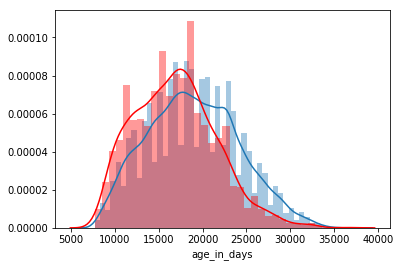

In [27]:
sns.distplot(train['age_in_days'][train['target']==1])
sns.distplot(train['age_in_days'][train['target']==0],color='r')

In [28]:
def pay(number):
    if(number<20000):
        return 'may not pay'
    else:
        return 'may pay'

In [29]:
train=pd.get_dummies(train,columns=['sourcing_channel','residence_area_type'],drop_first=True)
test=pd.get_dummies(test,columns=['sourcing_channel','residence_area_type'],drop_first=True)

In [30]:
ID=test['id'].values

In [32]:
train.drop(columns=['Unnamed: 0','id'],inplace=True)

In [33]:
test.drop(columns=['Unnamed: 0','id'],inplace=True)

In [49]:
train.isnull().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
target                              0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
sourcing_channel_E                  0
residence_area_type_Urban           0
dtype: int64

In [51]:
train.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,1,0,1,0,0,1
1,0.010,21546,315150,0.0,0.0,0.0,99.89,21,1,0,0,0,0,1
2,0.917,17531,84140,2.0,3.0,1.0,98.69,7,0,0,1,0,0,0
3,0.049,15341,250510,0.0,0.0,0.0,99.57,9,1,0,0,0,0,1
4,0.052,31400,198680,0.0,0.0,0.0,99.87,12,1,1,0,0,0,1


In [54]:
y=train['target'].values

In [58]:
train.drop(columns='target',inplace=True)

In [61]:
X=train.iloc[:,:].values

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [63]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()


In [64]:
classifier.fit(X_train,y_train)          # training on given data

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
y_pred=classifier.predict(X_test)       # predicting the answer

In [66]:
from sklearn.metrics import accuracy_score        # we get 90 % accuracy
accuracy_score(y_pred,y_test)

0.9021428571428571

In [69]:
X_final=test.iloc[:,:].values

In [70]:
y_final=classifier.predict(X_final)

In [71]:
final=pd.DataFrame()

In [73]:
final['id']=ID
final['target']=y_final

In [74]:
final.to_csv('insurance.csv',index=False)            # saved the answers to a file named "insurance.csv"